In [ ]:
!nvidia-smi

Mon Sep  4 07:20:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
! pip install -q onnxruntime onnx==1.14.0 onnxruntime-gpu onnxruntime_tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.3 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *
from tqdm.notebook import tqdm
import numpy as np
import json

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/New folder

/content/drive/MyDrive/New folder


In [ ]:
df = pd.read_csv("final_details.csv")


In [ ]:
df=df.drop_duplicates(subset=['url'])
df = df[df.types != '[]']
df.describe()

,title,url,description,types
count,18397,18397,18396,18397
unique,17332,18397,14719,17254
top,Paella,https://eatsmarter.com/recipes/cucumber-sandwiches-with-fresh-goat-cheese,30 mins,"['None', 'low-carb']"
freq,24,1,320,157


In [ ]:
df = df.dropna().reset_index(drop=True)
df.shape

(18396, 4)

In [ ]:
import ast

for i in range(len(df.types)):
  try:
    list_1 = ast.literal_eval(df.types[i])
    if isinstance(list_1, list):
      df.types[i] = list_1
  except (ValueError, SyntaxError):
    pass

In [ ]:
 types_list = df.types.to_list()

In [ ]:
mapping = {
    'Onion': 'Vegetable',
    'Poultry': 'Chicken',
    'saltwater\xa0Fish': 'saltwater fish',
    'Root Vegetable': 'Vegetable',
    'High-fiber Vegetarian Dish':'Vegetarian',
    'flowering vegetables':'Vegetable',
    'baked dish':'Baking',
    'leafy green vegetable':'Vegetable',
    'Gluten-free Dinner':'Gluten-free',
    'Gluten-free Vegetarian Recipe':'Gluten-free',
    'Gluten-free Lunch':'Gluten-free',
    'Vegetarian Entree': 'Vegetarian',
    'Vegetarian Lunch':'Vegetarian',
    'Vegetarian Dinner':'Vegetarian',
    'Side Salad':'salad',
    'dessert':'Dessert'
}

for sublist in types_list:
    for i in range(len(sublist)):
        sublist[i] = mapping.get(sublist[i], sublist[i])

types_list[1]

['Finger Food',
 'Low-cholesterol',
 'Fitness',
 'Healthy Eating',
 'Low-calorie',
 'Low-calorie Meat Dish',
 '250-400 Calorie',
 'low-carb',
 'non-alcoholic',
 'egg-free',
 'Pescetarian',
 'Special',
 '25-Minute',
 'Buffet',
 'Exotic',
 'Cooking on vacation',
 'festively',
 'Meal for Four',
 'Garden Party',
 'Guest',
 'Party',
 'Picnic',
 'Cooking',
 'Fish',
 'Vegetable',
 'Vegetable',
 'Vegetable',
 'Herb',
 'Dairy',
 'Fruit',
 'Brunch',
 'Snack',
 'Party Snack',
 'Party Snack',
 'Tapas',
 'Appetizer']

In [ ]:
for sublist in types_list:
    new_sublist = []
    for item in sublist:
        if item not in ['Snack','Family','skillet dish','Glyx','Classic', 'Spices','Meal for Four','Home Cooking', 'Side Dish','Grain','Primi Piatti','Main Course','Spring','Dinner','Lunch','Light Cooking','Herb','Casserole','Legume','Sauce','Clean Eating','Healthy Eating','Party Snack','Pescetarian','Picnic','Garden Party','Party','Stomach Discomfort','everyday meal','Elevated Blood Lipid','Crohn&#039;s Disease','European','Course','Main Course''Meal for Four','Menu', 'Guest', 'Easy', 'Lactation', 'Quick','Cooking','Osteoarthritis','Stress','Iron Deficiency','Cooking on vacation','Pregnancy','Fertility']:
            new_sublist.append(item)
    sublist[:] = new_sublist
types_list[1]

['Finger Food',
 'Low-cholesterol',
 'Fitness',
 'Low-calorie',
 'Low-calorie Meat Dish',
 '250-400 Calorie',
 'low-carb',
 'non-alcoholic',
 'egg-free',
 'Special',
 '25-Minute',
 'Buffet',
 'Exotic',
 'festively',
 'Fish',
 'Vegetable',
 'Vegetable',
 'Vegetable',
 'Dairy',
 'Fruit',
 'Brunch',
 'Tapas',
 'Appetizer']

In [ ]:
for i in range (len(types_list)):
  types_list[i]=types_list[i][:10]

types_list[1]

['Finger Food',
 'Low-cholesterol',
 'Fitness',
 'Low-calorie',
 'Low-calorie Meat Dish',
 '250-400 Calorie',
 'low-carb',
 'non-alcoholic',
 'egg-free',
 'Special']

In [ ]:
for sublist in types_list:
    sublist[:] = list(set(sublist))
types_list[1]

['egg-free',
 '250-400 Calorie',
 'low-carb',
 'non-alcoholic',
 'Low-calorie',
 'Fitness',
 'Low-cholesterol',
 'Finger Food',
 'Low-calorie Meat Dish',
 'Special']

In [ ]:
df.types=types_list

In [ ]:
df

,title,url,description,types
0,Cucumber Sandwiches with Fresh Goat Cheese,https://eatsmarter.com/recipes/cucumber-sandwiches-with-fresh-goat-cheese,"Due to the high water content, the vegetables are very helpful for weight loss. 100 grams of cucumber provide just 12 calories. Cucumbers also contain potassium, iron, zinc, fluorine, and some vitamin C. With the goat's cheese comes satiating protein between the slices.","[Cheese, Vegetable, low-carb]"
1,Smoked Trout Tartare with Avocado Mango Salsa,https://eatsmarter.com/recipes/smoked-trout-tartare-with-avocado-mango-salsa,"The sulfur substances contained in chives are responsible for their slight pungency. They provide a slight antibacterial effect and have a positive effect on digestion. If things run smoothly in the intestines, our concentration is also ensured. This is also supported by the omega-3 fatty acids from the smoked salmon trout.","[egg-free, 250-400 Calorie, low-carb, non-alcoholic, Low-calorie, Fitness, Low-cholesterol, Finger Food, Low-calorie Meat Dish, Special]"
2,Basic Tofu Recipe,https://eatsmarter.com/recipes/basic-tofu-recipe,"Do you have a sensitive stomach? Then tofu is perfect for you, because it's easy on the stomach and doesn't put a strain on digestion. Great veggie option: With around 15 percent vegetable protein, soy cheese gives us about as much as most types of meat offer.","[High-protein, low-carb, Gluten-free Vegan Recipe, non-alcoholic, lactose-free, Low-cholesterol, nutritional, Tofu, Gluten-free, Mineral-rich]"
3,Grilled Watermelon with Herbed Ricotta,https://eatsmarter.com/recipes/grilled-watermelon-with-herbed-ricotta,"Despite the fruity-sweet taste of Watermelons there is relatively little sugar in it. On top, the fruit provides plenty of liquid for a refreshing feast on hot summer days. Essential oils from Cress help to get disease-causing bacteria under control. For example, cold symptoms can subside more quickly.","[100-250 Calorie, low-carb, low-carb dinner, vegetarian grilling, nutritional, Gluten-free Snack, Gluten-free]"
4,Egg Bites with Smoked Salmon and Broccoli,https://eatsmarter.com/recipes/egg-bites-with-smoked-salmon-and-broccoli,"Eggs contain a lot of biotin. This B vitamin promotes hair growth and a healthy nail bed. In addition, the substance is needed for all metabolic processes in the organism.","[pastry, low-carb, North America, Baking, nutritional, muffin, Gluten-free Snack, regional, Gluten-free Fish Recipe, Gluten-free]"
...,...,...,...,...
18391,Sausage and Ham Croissants,https://eatsmarter.com/recipes/sausage-and-ham-croissants,Roll the dough on a lightly floured surface to 4-5 mm (approximately 1/8 inch) thick. Cut into 3 cm (approximately 1 1/4 inch) wide and 20 cm (approximately 8 inch) long strips.,"[250-400 Calorie, Breakfast, Quark-oil Dough, Milk, Pork, Dairy, Eggs]"
18392,Shakshuka with Eggplant,https://eatsmarter.com/recipes/shakshuka-with-eggplant,This delicious vegetable and egg shakshuka dish is packed with a slew of vitamins and minerals thanks to the vegetable mixture as well as powerful protein from the eggs. Shakshukas are versatile and are a complete meal,"[What to Cook on Sunday?, North America, Rustic, Baking, What to Cook on the Weekend?, skillet vegetables, soul food, Tunisian, Eggs, Fun Food]"
18393,Currant Jelly,https://eatsmarter.com/recipes/currant-jelly-1,"Remove the jelly from the pan, and place on a long platter. Serve with bread and cheese.","[Jelly, non-alcoholic, lactose-free, Vegetarian, Low-cholesterol, Low-fat, fat-free, Low-sugar, Vegan, Gluten-free]"
18394,Multi-Grain Walnut Bread,https://eatsmarter.com/recipes/multi-grain-walnut-bread,"Add both flours, the shredded wheat, ground walnuts and salt and knead with the dough hook until smooth. Cover and let rise in a warm place until doubled in bulk, about 45 minutes.","[crowdpleaser, Brunch, Bread Dough, Bread, Rustic, Country Style, Baking, Nut, weekend cooking, Yeast Dough]"


In [ ]:
types_list = df.types.to_list()
type_count = {}
for type1 in types_list:
  if isinstance(type1, list):
    type_list = type1
  else:
    type_list = eval(type1)
  for type2 in type_list:
    if type2 in type_count.keys():
      type_count[type2] += 1
    else:
      type_count[type2] = 1
print(f"Number of types: {len(type_count)}")
print(type_count)

Number of types: 1025
{'Cheese': 733, 'Vegetable': 6299, 'low-carb': 5264, 'egg-free': 677, '250-400 Calorie': 723, 'non-alcoholic': 1210, 'Low-calorie': 247, 'Fitness': 152, 'Low-cholesterol': 829, 'Finger Food': 225, 'Low-calorie Meat Dish': 4, 'Special': 50, 'High-protein': 1501, 'Gluten-free Vegan Recipe': 148, 'lactose-free': 840, 'nutritional': 1003, 'Tofu': 95, 'Gluten-free': 931, 'Mineral-rich': 524, '100-250 Calorie': 412, 'low-carb dinner': 192, 'vegetarian grilling': 27, 'Gluten-free Snack': 115, 'pastry': 510, 'North America': 476, 'Baking': 2256, 'muffin': 77, 'regional': 267, 'Gluten-free Fish Recipe': 72, 'Lactose-free Dessert': 42, 'high-fiber': 1145, 'High-fiber Snack': 90, 'Gluten-free Dessert': 96, 'Lactose-free Snacks': 62, 'Snack for Kids': 31, 'Children&#039;s Party': 29, 'Vegan Dessert': 62, 'birthday for kids': 24, 'Vegan': 644, 'cooking for kids': 94, 'Vegan Snack': 84, 'Stew': 291, 'Slim Down While You Sleep Diet': 47, 'High-fiber Soup': 79, 'Paleo Main Dish':

In [ ]:
threshold = int(len(df) * 0.02)
rare_types = [key for key, value in type_count.items() if value < threshold]
len(rare_types), rare_types[:10]

(970,
 ['Low-calorie',
  'Fitness',
  'Finger Food',
  'Low-calorie Meat Dish',
  'Special',
  'Gluten-free Vegan Recipe',
  'Tofu',
  'low-carb dinner',
  'vegetarian grilling',
  'Gluten-free Snack'])

In [ ]:
types_list
revised_types_list = []
indices_to_drop = []

for idx, types in enumerate(types_list):
  if isinstance(types, list):
    type_list = types
  else:
    type_list = eval(types)

  revised_types = []

  for type1 in type_list:
    if type1 not in rare_types:
      revised_types.append(type1)

  if len(revised_types) == 0:
    indices_to_drop.append(idx)
  else:
    revised_types_list.append(revised_types)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(18284, 4)

In [ ]:
df['revised_types'] = revised_types_list

In [ ]:
df.tail()

,title,url,description,types,revised_types
18279,Sausage and Ham Croissants,https://eatsmarter.com/recipes/sausage-and-ham-croissants,Roll the dough on a lightly floured surface to 4-5 mm (approximately 1/8 inch) thick. Cut into 3 cm (approximately 1 1/4 inch) wide and 20 cm (approximately 8 inch) long strips.,"[250-400 Calorie, Breakfast, Quark-oil Dough, Milk, Pork, Dairy, Eggs]","[250-400 Calorie, Pork, Dairy, Eggs]"
18280,Shakshuka with Eggplant,https://eatsmarter.com/recipes/shakshuka-with-eggplant,This delicious vegetable and egg shakshuka dish is packed with a slew of vitamins and minerals thanks to the vegetable mixture as well as powerful protein from the eggs. Shakshukas are versatile and are a complete meal,"[What to Cook on Sunday?, North America, Rustic, Baking, What to Cook on the Weekend?, skillet vegetables, soul food, Tunisian, Eggs, Fun Food]","[North America, Baking, Eggs]"
18281,Currant Jelly,https://eatsmarter.com/recipes/currant-jelly-1,"Remove the jelly from the pan, and place on a long platter. Serve with bread and cheese.","[Jelly, non-alcoholic, lactose-free, Vegetarian, Low-cholesterol, Low-fat, fat-free, Low-sugar, Vegan, Gluten-free]","[non-alcoholic, lactose-free, Vegetarian, Low-cholesterol, Low-fat, Low-sugar, Vegan, Gluten-free]"
18282,Multi-Grain Walnut Bread,https://eatsmarter.com/recipes/multi-grain-walnut-bread,"Add both flours, the shredded wheat, ground walnuts and salt and knead with the dough hook until smooth. Cover and let rise in a warm place until doubled in bulk, about 45 minutes.","[crowdpleaser, Brunch, Bread Dough, Bread, Rustic, Country Style, Baking, Nut, weekend cooking, Yeast Dough]",[Baking]
18283,Homemade Red Currant Jelly,https://eatsmarter.com/recipes/homemade-red-currant-jelly,"Bring the mixture to a boil, and cook for 4 minutes. Fill the jelly into the sterilized prepared jars. Seal tightly, and turn upside down for 15 minutes. Turn right side up and cool completely.","[marmalade, Sweet, Jelly, Fruit, Red Currant Jam, In a jar, Summer, Red Currant Jelly, Pressure cooking]",[Fruit]


In [ ]:
revised_types_list = df.revised_types.to_list()
revised_types_list

[['Cheese', 'Vegetable', 'low-carb'],
 ['egg-free',
  '250-400 Calorie',
  'low-carb',
  'non-alcoholic',
  'Low-cholesterol'],
 ['High-protein',
  'low-carb',
  'non-alcoholic',
  'lactose-free',
  'Low-cholesterol',
  'nutritional',
  'Gluten-free',
  'Mineral-rich'],
 ['100-250 Calorie', 'low-carb', 'nutritional', 'Gluten-free'],
 ['pastry',
  'low-carb',
  'North America',
  'Baking',
  'nutritional',
  'Gluten-free'],
 ['low-carb', 'lactose-free', 'high-fiber', 'nutritional', 'Gluten-free'],
 ['low-carb', 'nutritional', 'Vegan'],
 ['High-protein', 'high-fiber', 'diet'],
 ['High-protein', 'low-carb', 'non-alcoholic', 'diet', 'Gluten-free'],
 ['Pasta', 'low-carb', 'nutritional'],
 ['egg-free',
  'non-alcoholic',
  'meat-free',
  'Low-cholesterol',
  'Gluten-free',
  'Mineral-rich'],
 ['low-carb', 'Fish', 'Low-cholesterol', 'Fruit'],
 ['High-protein', 'Fish', 'high-fiber', 'diet'],
 ['100-250 Calorie',
  'lactose-free',
  'high-fiber',
  'Vegetarian',
  'nutritional',
  'Gluten-free'

In [ ]:
revised_types_list
revised_type_count = {}
for types in revised_types_list:
  type_list = types
  for type1 in type_list:
    if type1 in revised_type_count.keys():
      revised_type_count[type1] += 1
    else:
      revised_type_count[type1] = 1
print(f"Number of types: {len(revised_type_count)}")
print(revised_type_count)

Number of types: 55
{'Cheese': 733, 'Vegetable': 6299, 'low-carb': 5264, 'egg-free': 677, '250-400 Calorie': 723, 'non-alcoholic': 1210, 'Low-cholesterol': 829, 'High-protein': 1501, 'lactose-free': 840, 'nutritional': 1003, 'Gluten-free': 931, 'Mineral-rich': 524, '100-250 Calorie': 412, 'pastry': 510, 'North America': 476, 'Baking': 2256, 'high-fiber': 1145, 'Vegan': 644, 'diet': 1704, 'Pasta': 2674, 'meat-free': 587, 'Fish': 1739, 'Fruit': 1588, 'Vegetarian': 2081, 'Meat': 2177, 'mushroom': 552, 'Beef': 533, 'salad': 2996, 'Eggs': 824, 'Seafood': 742, 'soup': 755, 'German': 437, 'Low-sugar': 390, 'Dessert': 2065, 'saltwater fish': 1206, 'fruit-vegetable': 2327, 'Vegetable Salad': 1061, '400-500 Calorie': 367, 'Chicken': 1429, 'Asian': 1062, 'Tropical Fruit': 786, 'Appetizer': 462, 'Roast': 969, 'Sprout': 786, 'Shrimp': 595, 'Shellfish': 423, 'Low-fat': 562, 'Italian': 1048, 'Pork': 401, 'American': 418, 'Dairy': 473, 'Dough': 2481, 'Rice': 1722, 'Pome Fruit': 543, 'Fruit Dessert': 5

In [ ]:
revised_type_count.keys()

dict_keys(['Cheese', 'Vegetable', 'low-carb', 'egg-free', '250-400 Calorie', 'non-alcoholic', 'Low-cholesterol', 'High-protein', 'lactose-free', 'nutritional', 'Gluten-free', 'Mineral-rich', '100-250 Calorie', 'pastry', 'North America', 'Baking', 'high-fiber', 'Vegan', 'diet', 'Pasta', 'meat-free', 'Fish', 'Fruit', 'Vegetarian', 'Meat', 'mushroom', 'Beef', 'salad', 'Eggs', 'Seafood', 'soup', 'German', 'Low-sugar', 'Dessert', 'saltwater fish', 'fruit-vegetable', 'Vegetable Salad', '400-500 Calorie', 'Chicken', 'Asian', 'Tropical Fruit', 'Appetizer', 'Roast', 'Sprout', 'Shrimp', 'Shellfish', 'Low-fat', 'Italian', 'Pork', 'American', 'Dairy', 'Dough', 'Rice', 'Pome Fruit', 'Fruit Dessert'])

In [ ]:
encode_types = { key: idx for idx, (key, value) in enumerate(revised_type_count.items())}
with open("recipe_types_encoded18.json", "w") as fp:
  json.dump(encode_types, fp)

In [ ]:
categorical_type_list = []
revised_types_list

for type5 in revised_types_list:
  categorical_list = [0] * len(encode_types)
  for type1 in type5:
    type1_index = encode_types[type1]
    categorical_list[type1_index] = 1
  categorical_type_list.append(categorical_list)

categorical_type_list[3][:45]

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
df['type_cat_list'] = categorical_type_list
df.head()

,title,url,description,types,revised_types,type_cat_list
0,Cucumber Sandwiches with Fresh Goat Cheese,https://eatsmarter.com/recipes/cucumber-sandwiches-with-fresh-goat-cheese,"Due to the high water content, the vegetables are very helpful for weight loss. 100 grams of cucumber provide just 12 calories. Cucumbers also contain potassium, iron, zinc, fluorine, and some vitamin C. With the goat's cheese comes satiating protein between the slices.","[Cheese, Vegetable, low-carb]","[Cheese, Vegetable, low-carb]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Smoked Trout Tartare with Avocado Mango Salsa,https://eatsmarter.com/recipes/smoked-trout-tartare-with-avocado-mango-salsa,"The sulfur substances contained in chives are responsible for their slight pungency. They provide a slight antibacterial effect and have a positive effect on digestion. If things run smoothly in the intestines, our concentration is also ensured. This is also supported by the omega-3 fatty acids from the smoked salmon trout.","[egg-free, 250-400 Calorie, low-carb, non-alcoholic, Low-calorie, Fitness, Low-cholesterol, Finger Food, Low-calorie Meat Dish, Special]","[egg-free, 250-400 Calorie, low-carb, non-alcoholic, Low-cholesterol]","[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,Basic Tofu Recipe,https://eatsmarter.com/recipes/basic-tofu-recipe,"Do you have a sensitive stomach? Then tofu is perfect for you, because it's easy on the stomach and doesn't put a strain on digestion. Great veggie option: With around 15 percent vegetable protein, soy cheese gives us about as much as most types of meat offer.","[High-protein, low-carb, Gluten-free Vegan Recipe, non-alcoholic, lactose-free, Low-cholesterol, nutritional, Tofu, Gluten-free, Mineral-rich]","[High-protein, low-carb, non-alcoholic, lactose-free, Low-cholesterol, nutritional, Gluten-free, Mineral-rich]","[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,Grilled Watermelon with Herbed Ricotta,https://eatsmarter.com/recipes/grilled-watermelon-with-herbed-ricotta,"Despite the fruity-sweet taste of Watermelons there is relatively little sugar in it. On top, the fruit provides plenty of liquid for a refreshing feast on hot summer days. Essential oils from Cress help to get disease-causing bacteria under control. For example, cold symptoms can subside more quickly.","[100-250 Calorie, low-carb, low-carb dinner, vegetarian grilling, nutritional, Gluten-free Snack, Gluten-free]","[100-250 Calorie, low-carb, nutritional, Gluten-free]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,Egg Bites with Smoked Salmon and Broccoli,https://eatsmarter.com/recipes/egg-bites-with-smoked-salmon-and-broccoli,"Eggs contain a lot of biotin. This B vitamin promotes hair growth and a healthy nail bed. In addition, the substance is needed for all metabolic processes in the organism.","[pastry, low-carb, North America, Baking, nutritional, muffin, Gluten-free Snack, regional, Gluten-free Fish Recipe, Gluten-free]","[pastry, low-carb, North America, Baking, nutritional, Gluten-free]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
labels = list(encode_types.keys())

In [ ]:
splitter = RandomSplitter(valid_pct=0.1, seed=42)
train_ids, valid_ids = splitter(df)
len(train_ids), len(valid_ids)

(16456, 1828)

In [ ]:
valid_df = df.loc[valid_ids]
valid_df.head()

,title,url,description,types,revised_types,type_cat_list
11222,Breaded Trout with Tomato Relish,https://eatsmarter.com/recipes/breaded-trout-with-tomato-relish,"Vitamin B2, also called riboflavin, plays an important role in protein and energy metabolism. In addition, it protects the outer shell of our nerves. A good thing that fish has plenty of this vital substance.","[High-protein, lactose-free, Freshwater Fish, Lactose-free Fish, nutritional, high cholesterol, High-protein Fish Dish, Gout, Hypertension, Diabetic]","[High-protein, lactose-free, nutritional]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
11108,Stuffed Kohlrabi Cups,https://eatsmarter.com/recipes/stuffed-kohlrabi-cups,"Kohlrabi is rich in calcium and magnesium, which strengthens bones and teeth. But it is not only the tuber itself that is rich in nutrients, the leaves are also rich in nutrients.","[German, crowdpleaser, Brunch, Nut, Appetizer, Finger Food, Family friendly, Summer, Vegetable, Autumn]","[German, Appetizer, Vegetable]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2178,Jelly-topped Squares,https://eatsmarter.com/recipes/jelly-topped-squares,75 mins,"[pastry, low-carb, open-face sandwich]","[pastry, low-carb]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
8441,Five-Fruit Jam,https://eatsmarter.com/recipes/five-fruit-jam,"Fill the prepared screw-top jars to the brim with the hot jam. Seal tightly, then turn upside down for 10 minutes to cool slightly. Turn right side up and cool completely.","[marmalade, lactose-free, Vegetarian, Low-cholesterol, Low-fat, Summer, Low-sugar, Low-protein, Vegan, Gluten-free]","[lactose-free, Vegetarian, Low-cholesterol, Low-fat, Low-sugar, Vegan, Gluten-free]","[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
4230,Baked Chicken Legs,https://eatsmarter.com/recipes/baked-chicken-legs-0,Trim chicken and pat dry.,"[Chicken, low-carb, Buffet]","[Chicken, low-carb]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
model_path = "/content/drive/MyDrive/New folder/models/recipe-classifier-stage-19.pkl"
learner_inf = load_learner(model_path)

In [ ]:
learner_inf.blurr_predict("random placeholder")

[{'labels': [],
  'scores': [],
  'class_indices': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'class_labels': ['low-carb', 'Vegetable', 'Cheese', '250-400 Calorie', 'non-alcoholic', 'Low-cholesterol', 'egg-free', 'nutritional', 'High-protein', 'Mineral-rich', 'Gluten-free', 'lactose-free', '100-250 Calorie', 'Baking', 'pastry', 'North America', 'high-fiber', 'Vegan', 'diet', 'Pasta', 'meat-free', 'Fruit', 'Fish', 'Vegetarian', 'Meat', 'Beef', 'mushroom', 'salad', 'Eggs', 'Seafood', 'soup', 'German', 'Dessert', 'Low-sugar', 'fruit-vegetable', 'saltwater fish', 'Vegetable Salad', '400-500 Calorie', 'Chicken', 'Asian', 'Appetizer', 'Tropical Fruit', 'Roast', 'Shrimp', 'Sprout', 'Shellfish', 'Low-fat', 'Ita

In [ ]:
learner_inf.blurr_predict("random placeholder")[0]['labels']

[]

In [ ]:
from sklearn import metrics

def metric_measures(test_df, preds):

  targets = [np.asarray(target) for target in test_df['type_cat_list'].to_list()]
  outputs = [np.asarray(pred) for pred in preds]


  accuracy = metrics.accuracy_score(targets, outputs)
  f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
  f1_score_macro = metrics.f1_score(targets, outputs, average='macro')

  print(f"F1 Score (Micro) = {f1_score_micro}")
  print(f"F1 Score (Macro) = {f1_score_macro}")

  return

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
  desc = row['description']
  labels = learner_inf.blurr_predict(desc)[0]['labels']
  pred_types = [0] * len(encode_types)
  for label in labels:
    pred_types[encode_types[label]] = 1
  preds.append(pred_types)

preds[0][:20]

  0%|          | 0/1828 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) = 0.13202614379084968
F1 Score (Macro) = 0.04690194036336168


In [ ]:
model_path = "/content/drive/MyDrive/New folder/models/recipe-classifier-stage-13.pkl"
learner_inf = load_learner(model_path)

In [ ]:
classifier = learner_inf.model.hf_model.eval()

torch.onnx.export(
    classifier,
    torch.LongTensor([[0] * 512]),
    '/content/drive/MyDrive/New folder/models/recipe2-classifier.onnx',
    input_names=['input_ids'],
    output_names=['output'],
    opset_version=13,
    dynamic_axes={
        'input_ids': {0: 'batch_size', 1: 'sequence_len'},
        'output': {0: 'batch_size'}
    }
)

/usr/local/lib/python3.10/dist-packages/transformers/models/distilbert/modeling_distilbert.py:223: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  mask, torch.tensor(torch.finfo(scores.dtype).min)


In [ ]:
!pip install -q onnxruntime.quantization

ERROR: Could not find a version that satisfies the requirement onnxruntime.quantization (from versions: none)
ERROR: No matching distribution found for onnxruntime.quantization


In [ ]:
from onnxruntime.quantization import quantize_dynamic, QuantType

onnx_model_path = '/content/drive/MyDrive/New folder/models/recipe2-classifier.onnx'
quantized_onnx_model_path = '/content/drive/MyDrive/New folder/models/recipe2-classifier-quantized.onnx'

quantize_dynamic(
    onnx_model_path,
    quantized_onnx_model_path,
    weight_type=QuantType.QUInt8,
)

Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.0/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.0/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.1/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.1/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.2/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.2/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.3/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.3/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.4/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.4/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.5/attention/MatMul]
Ignore MatM

In [ ]:
import onnxruntime as rt
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

class_labels = list(encode_types.keys())

inf_session = rt.InferenceSession('/content/drive/MyDrive/New folder/models/recipe2-classifier.onnx')
input_name = inf_session.get_inputs()[0].name
output_name = inf_session.get_outputs()[0].name

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=valid_df.shape[0]):
  desc = row['description']
  input_ids = tokenizer(desc)['input_ids'][:512]

  probs = inf_session.run([output_name], {input_name: [input_ids]})[0]
  probs = torch.FloatTensor(probs)

  masks = torch.sigmoid(probs) >= 0.5
  labels = [class_labels[idx] for idx, mask in enumerate(masks[0]) if mask]

  pred_genres = [0] * len(encode_types)
  for label in labels:
    pred_genres[encode_types[label]] = 1
  preds.append(pred_genres)

  0%|          | 0/1782 [00:00<?, ?it/s]

InvalidArgument: ignored

In [ ]:
metric_measures(valid_df, preds)

SuggestedLRs(slide=0.0004786300996784121, valley=9.120108734350652e-05)

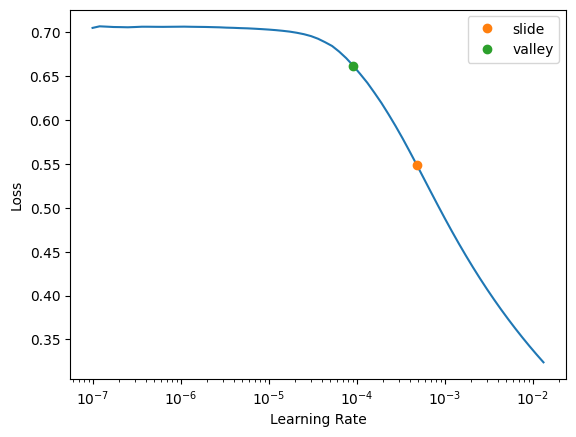

In [ ]:
import onnxruntime as rt
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

class_labels = list(encode_types.keys())

inf_session = rt.InferenceSession('/content/drive/MyDrive/New folder/models/recipe2-classifier-quantized.onnx')
input_name = inf_session.get_inputs()[0].name
output_name = inf_session.get_outputs()[0].name

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=valid_df.shape[0]):
  desc = row['description']
  input_ids = tokenizer(desc)['input_ids'][:512]

  probs = inf_session.run([output_name], {input_name: [input_ids]})[0]
  probs = torch.FloatTensor(probs)

  masks = torch.sigmoid(probs) >= 0.5
  labels = [class_labels[idx] for idx, mask in enumerate(masks[0]) if mask]

  pred_genres = [0] * len(encode_types)
  for label in labels:
    pred_genres[encode_types[label]] = 1
  preds.append(pred_genres)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.000595,0.000285,1.000000,01:02
1,0.000075,0.000064,1.000000,01:08
2,0.000038,0.000035,1.000000,01:02
3,0.000029,0.000027,1.000000,01:03
4,0.000027,0.000026,1.000000,00:53


In [ ]:
metric_measures(valid_df, preds)

In [ ]:
learner.export("/content/drive/MyDrive/New folder/models/recipe-classifier-stage-9.pkl")